### Correlation Analysis


Correlation analysis is a crucial step in exploratory data analysis (EDA) as it helps to understand the relationships between variables. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [4, 4.5]

In [8]:
df = pd.read_csv("Data/Sleep_health_and_lifestyle_dataset.csv").iloc[:,1:]

In [9]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [10]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
print(numeric_df.columns)

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')


#### Pearson Correlation Coefficient

Measures the linear correlation between two variables, giving a value between -1 (perfect negative linear relationship) and +1 (perfect positive linear relationship).

In [11]:
numeric_df.corr()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


In [13]:
numeric_df.corr()['Quality of Sleep'][:].sort_values(ascending=False).to_frame()

,Quality of Sleep
Quality of Sleep,1.000000
Sleep Duration,0.883213
Age,0.473734
Physical Activity Level,0.192896
Daily Steps,0.016791
Heart Rate,-0.659865
Stress Level,-0.898752


There is a very strong positive correlation between Sleep Duration and Quality of Sleep. This suggests that that longer sleep duration is associated with better sleep quality, and vice versa. <br>
There is a strong negative correlation between sleep quality and stress level, indicating that better sleep quality is associated with lower stress levels.

#### Correlation Matrix
A correlation matrix is a square table that shows the correlation coefficients between all pairs of (numeric) variables in a dataset. <br>
It ranges from -1 to 1, with a coefficient of -1 indicating a perfect negative correlation, a coefficient of 1 indicating a perfect positive correlation, and a coefficient of 0 indicating no correlation. <br>

In [14]:
def corr_matrix(df):
    # Compute the correlation matrix
    correlation_matrix = df.corr()

    # Generate a mask for the bottom half of the correlation matrix
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Create a heatmap with the mask and color scale
    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, square=True, cbar=True)
    plt.title('Correlation Plot')
    plt.show()

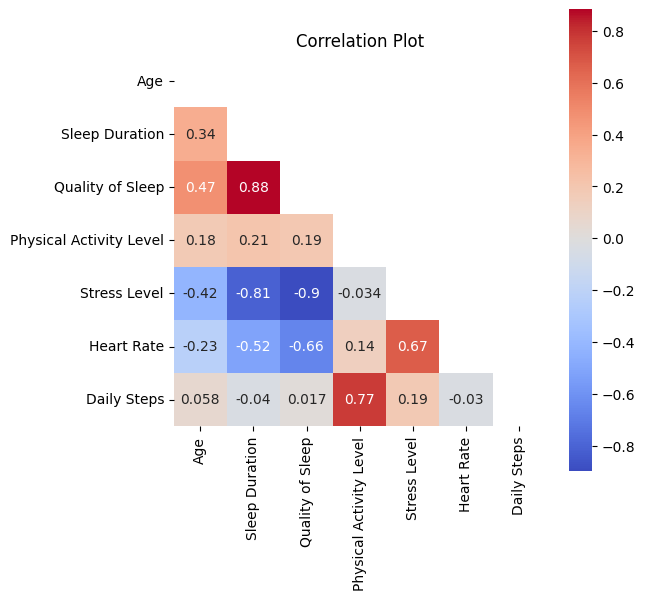

In [15]:
corr_matrix(numeric_df)

The colors correspond to the correlation coefficient values, with red indicating positive correlation and blue indicating negative correlation. <br>

#### Scatterplot + Linear Regression Fit Line
A scatterplot with a linear regression fit line is used for visualizing and understanding the relationship between two quantitative variables. <br>
The sns.lmplot() and sns.regplot() functions in Seaborn, are both used to create scatter plots with a linear regression line and a 95% confidence interval. <br>
But only lmplot() has hue as a parameter.


In [18]:
x = "Quality of Sleep"
y = "Stress Level"

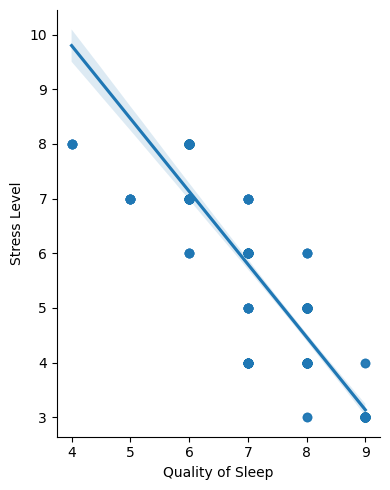

In [19]:
sns.lmplot(x=x, y=y, data=df, aspect=1.2/1.5);

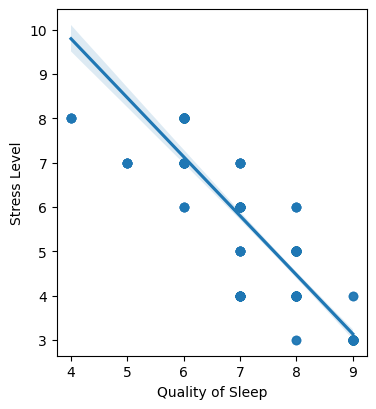

In [20]:

sns.regplot(x=x, y=y, data=df);

In [25]:
df['BMI Category'].nunique()

4

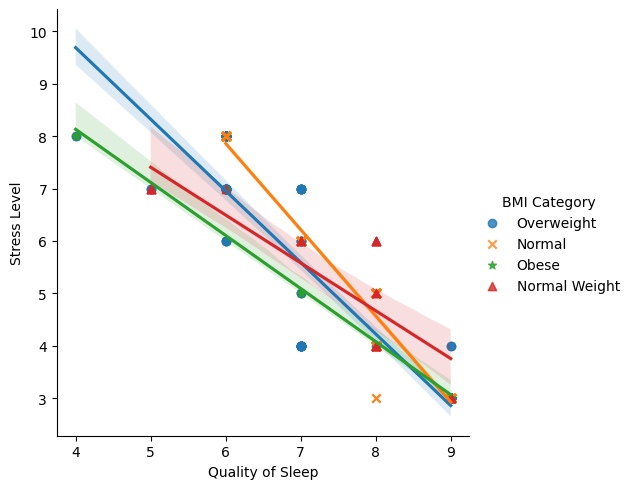

In [26]:
sns.lmplot(x=x, y=y, data=df, hue='BMI Category', markers=['o', 'x', '*', '^']);

#### Pairplot
A pairplot shows pairwise relationship between all variables in a dataset.

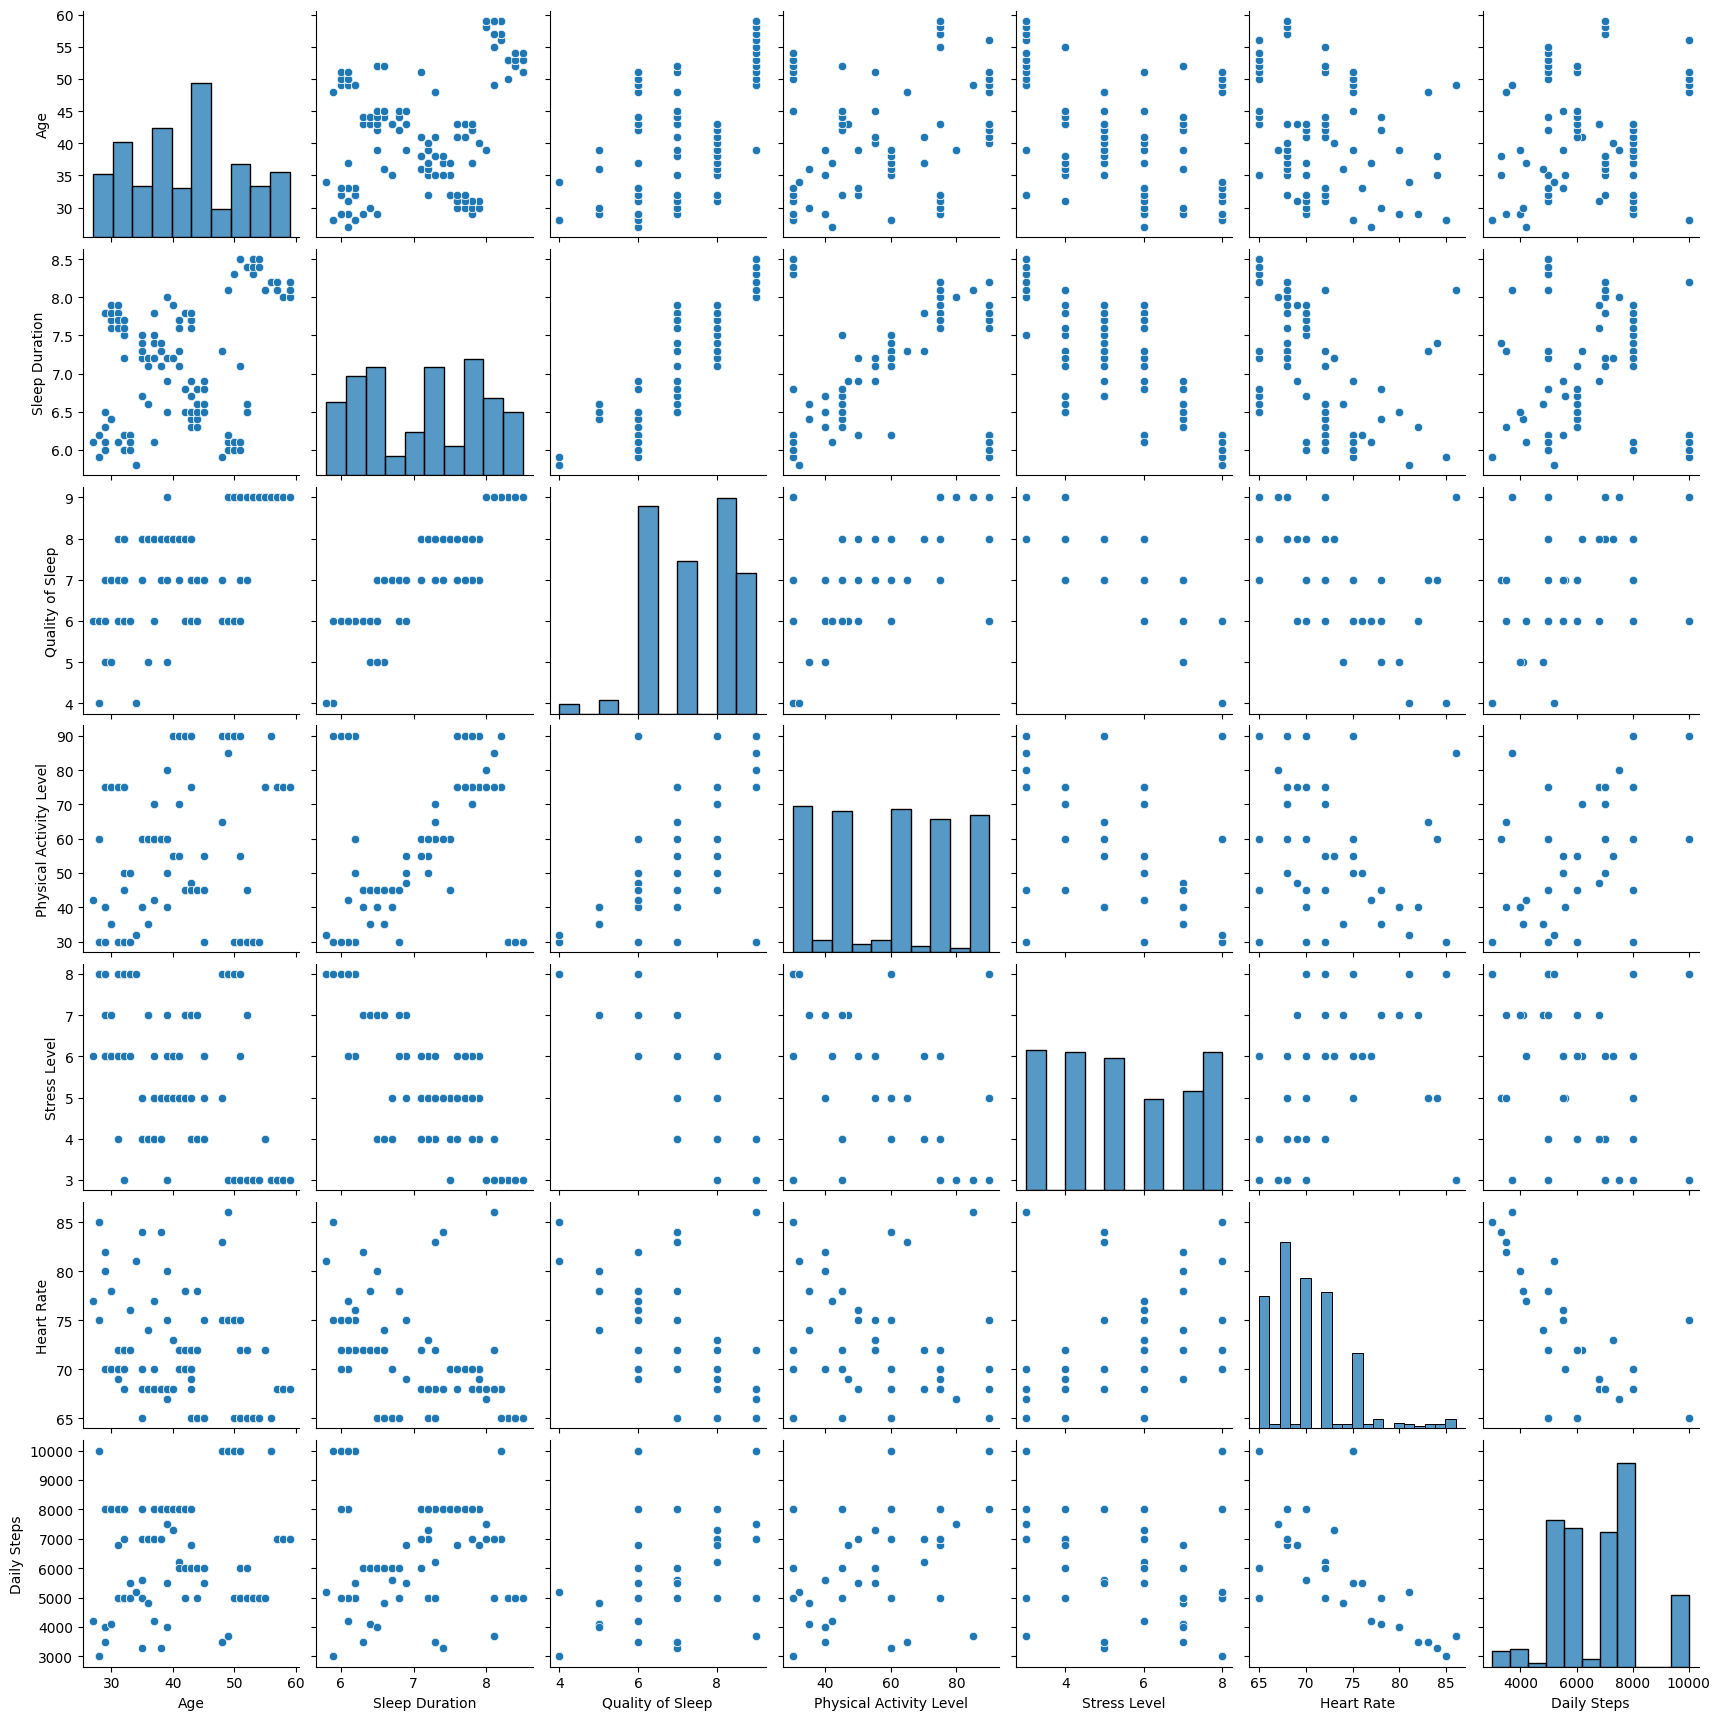

In [27]:
sns.pairplot(df)
plt.show()